In [2]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from models import GaussianDistribution, build
from hmc_sampler import hamiltonian
from sklearn import preprocessing
from surrogate import NeuralGrad

In [3]:
# Dimension of parameter space and number of training points
dim_gaussian = 20
num_training = 1000

In [4]:
# Gaussian distribution with mean and  covariance Matrix
mu = np.zeros(dim_gaussian)
var = np.ones(dim_gaussian)
test_model = GaussianDistribution(mu,var)

In [5]:
# Generate training data

training_data = test_model.sample(num_training)
#print(training_data.shape)
energy = np.zeros(training_data.shape[0])
gradient = np.zeros((training_data.shape[0],training_data.shape[1]))
for i in range(training_data.shape[0]):
    energy[i] = test_model.energy(training_data[i,:])
    gradient[i] =test_model.gradient(training_data[i,:])


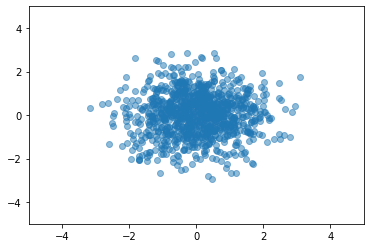

In [6]:
fig = plt.figure(figsize=(6,4))
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(training_data[:,0],training_data[:,1],'o',alpha=1.5)
plt.show()


In [7]:
 # Train the NN to approximate gradient

scaled_data = preprocessing.StandardScaler().fit(training_data)
training_data = preprocessing.scale(training_data)
model = build(dim_gaussian, [50], [dim_gaussian])
model.fit(training_data, gradient, epochs=10, batch_size=20)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                1050      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
Total params: 2,070
Trainable params: 2,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 0s 790us/step - loss: 1.2886
Epoch 2/10
50/50 [==============================] - 0s 879us/step - loss: 0.8655
Epoch 3/10
50/50 [==============================] - 0s 960us/step - loss: 0.6146
Epoch 4/10
50/50 [==============================] - 0s 820us/step - loss: 0.4618
Epoch 5/10
50/50 [==============================] - 0s 789us/step

In [8]:
 #Using the NN inside HMC to sample points
grad_hat = NeuralGrad(model,scaled_data)
nnghmc_draws = hamiltonian(model=test_model, sample_size=1000, leapfrog_steps=10, stepsize=0.1,surrogate=grad_hat)[0]

100 iterations with acceptance probability 0.73
200 iterations with acceptance probability 0.76
300 iterations with acceptance probability 0.84
400 iterations with acceptance probability 0.76
500 iterations with acceptance probability 0.74
600 iterations with acceptance probability 0.79
700 iterations with acceptance probability 0.79
800 iterations with acceptance probability 0.8
900 iterations with acceptance probability 0.63
1000 iterations with acceptance probability 0.75


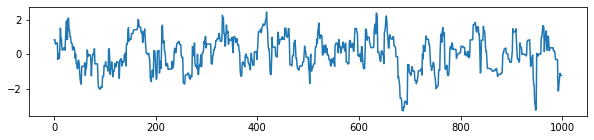

In [13]:
# Trace plots to see convergence
fig = plt.figure(figsize=(10, 2))
plt.plot(nnghmc_draws[:, 0])


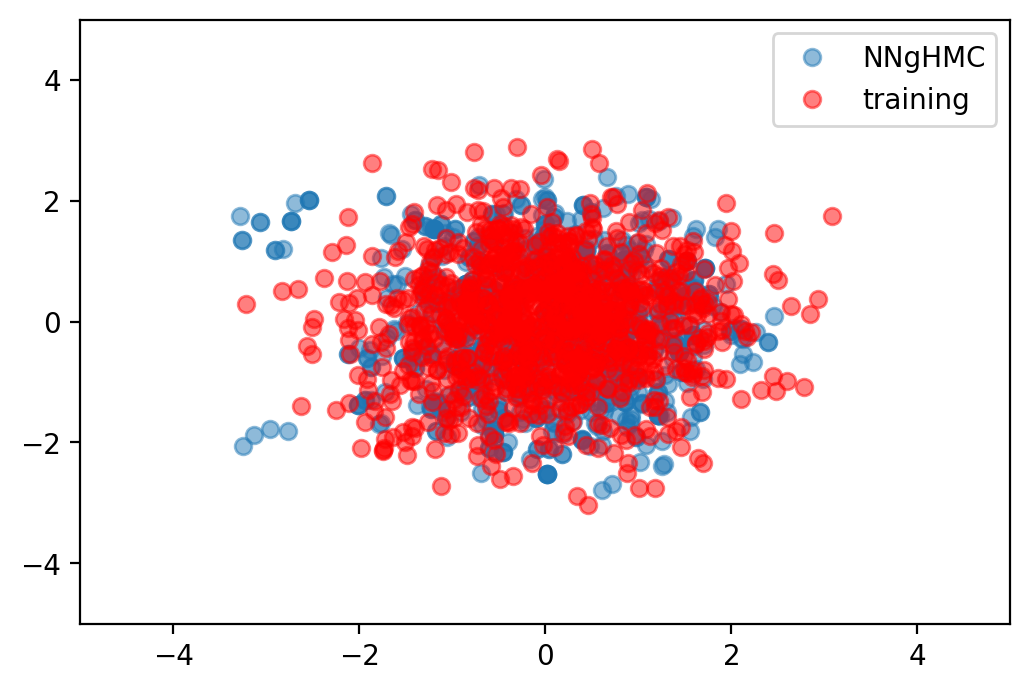

In [14]:
#NNgHMC draws 
fig = plt.figure(figsize=(6, 4), dpi=200)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(nnghmc_draws[:, 0], nnghmc_draws[:, 1], 'o', alpha=0.5,label='NNgHMC')
plt.plot(training_data[:,0],training_data[:,1],'ro',alpha=0.5,label="training")
plt.legend()